#**Estudio del gen BRCA en cáncer de mama**
---
🔗https://github.com/PaolaSantiago00/C-ncer-de-mama-/blob/main/README.md




##**Introducción**


---
 El gen de BRCA1 y BRCA2 se tratan de genes de predisposición de cáncer de mama y ovario. Si bien por estructura génetica es propio del ser humano contar con dichos genes, sin embargo, debido en diversos individuos pueden presentarse mutaciones que aumenten el riesgo de desarrollar cáncer de mama.

Buscando dar resolución a nuestros objetivos planteados, utilizando datos de [cBioPortal](https://www.cbioportal.org/).


📚 **Referencias**


---



1.   Varol, et. al (2018). *BRCA genes: BRCA 1 and BRCA 2*. Recuperado de
https://jbuon.com/archive/23-4-862.pdf


##**Objetivos**

**Se va analizar datasets del cáncer de mama, junto con sus mutaciones BRCA1 y BRCA2**

Se pretende dar respuesta a las siguientes preguntas:

*  ¿En qué edad se encuentra el mayor porcentaje de casos con cáncer de mama?
*  ¿Existen patrones geográficos en la prevalencia de cáncer de mama?
*  ¿Cuál es la frecuencia de supervivencia entre las pacientes?
*  ¿Cuál es el “tipo de cáncer” de mama con más casos?

##**Desarrollo de proyecto**


---
A partir de esta sección, se podrá encontrar el código realizado para llevar a
cabo el análisis correspondiente


In [223]:
#Librerías

import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import skew, kurtosis
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

##**Cáncer de mama**

In [224]:
df_mama = pd.read_csv("https://raw.githubusercontent.com/PaolaSantiago00/C-ncer-de-mama./main/C-ncer-de-mama-main/combined_study_clinical_data.csv")

df_mama.head()

,Study ID,Patient ID,Sample ID,Adjuvant Chemotherapy,Adjuvant Treatment,Diagnosis Age,Cancer Type,Cancer Type Detailed,ER Status By IHC,Followup (years),...,Time To Death (Months),Tumor Sample Histology,Tumor Tissue Origin,T Stage,Archer Panel,Institute Source,Patient Display Name.1,Sample Display Name,Tumor Site,Tumor Size (cm)
0,brca_pareja_msk_2020,brca_impact_wes_25,25DCIS,NaN,NaN,NaN,Breast Cancer,Breast,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,brca_pareja_msk_2020,brca_impact_wes_25,25IDC,NaN,NaN,NaN,Breast Cancer,Breast,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,bfn_duke_nus_2015,BFN_DUKE_NUS_1007,BFN_DUKE_NUS_1007,NaN,NaN,26.0,Breast Sarcoma,Benign Phyllodes Tumor of the Breast,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,brca_broad,BR-M-027,BR-M-027,NaN,NaN,51.0,Breast Cancer,Infiltrating Ductal Carcinoma,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,brca_broad,BR-V-023,BR-V-023,NaN,NaN,40.0,Breast Cancer,Ductal Carcinoma In Situ (DCIS),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [225]:
#Investigar con cuantas filas y columnas cuenta el dataset
num_filas_np, num_columnas_np = df_mama.shape

print("Número de filas:", num_filas_np)
print("Número de columnas:", num_columnas_np)

Número de filas: 482
Número de columnas: 397


In [226]:
# Obtener e imprimir el nombre de todas las columnas
print("Nombres de las columnas:")
for nombre_columna in df_mama.columns:
    print(nombre_columna)

Nombres de las columnas:
Study ID
Patient ID
Sample ID
Adjuvant Chemotherapy
Adjuvant Treatment
Diagnosis Age
Cancer Type
Cancer Type Detailed
ER Status By IHC
Followup (years)
Fusion Status
Genomic Alterations
IHC-HER2
Local Regional Recurrence
Metastatic Site
Metastatic tumor indicator
Mutation Count
MYB or MYBL1 Fusion
MYB-NFIB Fusion Gene Copy Number Alterations
MYB-NFIB FISH
MYB-NFIB Fusion Gene Non-synonymous Mutations
MYB-NFIB Rearrangement
Neoadjuvant Chemotherapy
Oncotree Code
Overall Patient Histology
Platform
Primary Tumor Site
PR status by ihc
Radiation Therapy
Number of Samples Per Patient
Sample Type
Sex
Somatic Status
Study
Time to Metastasis (months)
TMB (nonsynonymous)
Tumor Size
Tumor Stage
Type of Surgery
Patient's Vital Status
Ethnicity Category
Neoplasm Histologic Type Name
Mean Coverage (x)
Total Number of Somatic Mutations
Surgery
Angiolymphatic Invasion
Neoplasm American Joint Committee on Cancer Clinical Distant Metastasis M Stage
Neoplasm American Joint Commit

**Mutación** mama BRCA1

In [227]:
brca1_mama_mutation = pd.read_csv('https://raw.githubusercontent.com/PaolaSantiago00/C-ncer-de-mama./main/C-ncer-de-mama-main/BRCA1_mama%20(separado)%20NUEVO%20-%20BRCA1_mama%20(separado)%20NUEVO%20(1).csv',index_col=0)

brca1_mama_mutation.head()

,Sample ID,Cancer Type,Cancer Type Detailed,Protein Change,Annotation OncoKb,CancerHotspot,MutationAssesor Impact,SIFT Impact,sift_score,Polyphen-2 Impact,...,Time To Death (Months),Tumor Sample Histology,Tumor Tissue Origin,T Stage,Archer Panel,Institute Source,Patient Display Name.1,Sample Display Name,Tumor Site,Tumor Size (cm)
Study of Origin,,,,,,,,,,,,,,,,,,,,,
"Metastatic Breast Cancer (INSERM, PLoS Med 2016)",MBC_47,Breast Cancer,Invasive Breast Carcinoma,M1728Kfs*3,Likely Oncogenic,no,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"The Metastatic Breast Cancer Project (Archived, 2020)",MBC-MBCProject_zatdFvhp-Tumor-SM-GQAAR,Breast Cancer,"Breast Invasive Cancer, NOS",X1823_splice,Likely Oncogenic,no,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Breast Invasive Carcinoma (TCGA, Nature 2012)",TCGA-BH-A0WA-01,Breast Cancer,Invasive Breast Carcinoma,X1559_splice,Likely Oncogenic,no,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Breast Invasive Carcinoma (TCGA, Nature 2012)",TCGA-AN-A0XU-01,Breast Cancer,Invasive Breast Carcinoma,G1788V,Likely Oncogenic,no,medium,deleterious,0.0,benign,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Breast Invasive Carcinoma (TCGA, Nature 2012)",TCGA-AR-A0U4-01,Breast Cancer,Invasive Breast Carcinoma,N1121Kfs*12,Likely Oncogenic,no,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [228]:
#Investigamos con cuantas filas y columnas cuenta el dataset
num_filas_np, num_columnas_np = brca1_mama_mutation.shape

print("Número de filas:", num_filas_np)
print("Número de columnas:", num_columnas_np)

Número de filas: 225
Número de columnas: 587


In [229]:
# Obtener e imprimir el nombre de todas las columnas
print("Nombres de las columnas:")
for nombre_columna in brca1_mama_mutation.columns:
    print(nombre_columna)

Nombres de las columnas:
Sample ID
Cancer Type
Cancer Type Detailed
Protein Change
Annotation OncoKb
CancerHotspot
MutationAssesor Impact
SIFT Impact
sift_score
Polyphen-2 Impact
polyphen_2_score
Mutation Type
Copy #
COSMIC
MS
VS
Center
Chromosome
Start Pos
End Pos
Ref
Var
HGVSg
HGVSc
Allele Freq (T)
Allele Freq (N)
Variant Reads
Ref Reads
Variant Reads (Normal)
Ref Reads (Normal)
# Mut in Sample
Exon
gnomAD
ClinVar
dbSNP
SIGNAL
Adjuvant Chemotherapy
Adjuvant Treatment
diagnosis_age
ER Status By IHC
Followup (years)
Fusion Status
Genomic Alterations
IHC-HER2
Local Regional Recurrence
Metastatic Site
Metastatic tumor indicator
MYB or MYBL1 Fusion
MYB-NFIB Fusion Gene Copy Number Alterations
MYB-NFIB FISH
MYB-NFIB Fusion Gene Non-synonymous Mutations
MYB-NFIB Rearrangement
Neoadjuvant Chemotherapy
Oncotree Code
Overall Patient Histology
Platform
Primary Tumor Site
PR status by ihc
Radiation Therapy
Number of Samples Per Patient
Sample Type
Sex
Somatic Status
Study
Time to Metastasis (mon

*Mutación mama BRCA2*

In [230]:
brca2_mama_mutation = pd.read_csv('https://raw.githubusercontent.com/PaolaSantiago00/C-ncer-de-mama./main/C-ncer-de-mama-main/BRCA2_mama%20(separado).csv')

brca2_mama_mutation.head()

,Study of Origin,Sample ID,Cancer Type,Cancer Type Detailed,Protein Change,Annotation OncoKB,CancerHotspot,Functional Impact MutationAssesor,Functional Impact MutationAssesor Score,Functional Impact SIFT,...,Time To Death (Months),Tumor Sample Histology,Tumor Tissue Origin,T Stage,Archer Panel,Institute Source,Patient Display Name.1,Sample Display Name,Tumor Site,Tumor Size (cm)
0,"Non-CDH1 Invasive Lobular Carcinoma (MSK, 2023)",CDW21,Breast Cancer,Breast Invasive Lobular Carcinoma,Q2506Sfs*21,"OncoKB: Likely Oncogenic, level_3a, resistance NA",no,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NO,MSKCC,P-0026032,P-0026032-T01-IM6,NaN,NaN
1,"Metastatic Breast Cancer (INSERM, PLoS Med 2016)",MBC_45,Breast Cancer,Invasive Breast Carcinoma,E654*,"OncoKB: Likely Oncogenic, level_3a, resistance NA",no,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Metastatic Breast Cancer (INSERM, PLoS Med 2016)",MBC_50,Breast Cancer,Invasive Breast Carcinoma,X637_splice,"OncoKB: Likely Oncogenic, level_3a, resistance NA",no,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Metastatic Breast Cancer (INSERM, PLoS Med 2016)",MBC_40,Breast Cancer,Invasive Breast Carcinoma,P190Gfs*3,"OncoKB: Likely Oncogenic, level_3a, resistance NA",no,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Breast Invasive Carcinoma (TCGA, Nature 2012)",TCGA-A8-A08L-01,Breast Cancer,Invasive Breast Carcinoma,X2602_splice,"OncoKB: Likely Oncogenic, level_3a, resistance NA",no,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [231]:
#Investigamos con cuantas filas y columnas cuenta el dataset
num_filas_np, num_columnas_np = brca2_mama_mutation.shape

print("Número de filas:", num_filas_np)
print("Número de columnas:", num_columnas_np)

Número de filas: 356
Número de columnas: 588


In [232]:
# Obtener e imprimir el nombre de todas las columnas
print("Nombres de las columnas:")
for nombre_columna in brca2_mama_mutation.columns:
    print(nombre_columna)

Nombres de las columnas:
Study of Origin
Sample ID
Cancer Type
Cancer Type Detailed
Protein Change
Annotation OncoKB
CancerHotspot
Functional Impact MutationAssesor
Functional Impact MutationAssesor Score
Functional Impact SIFT
Functional Impact SIFT Score
Functional Impact Polyphen-2
Functional Impact Polyphen-2 Score
Mutation Type
Variant Type
Copy #
COSMIC
MS
VS
Center
Chromosome
Start Pos
End Pos
Ref
Var
HGVSg
HGVSc
Allele Freq (T)
Allele Freq (N)
Variant Reads
Ref Reads
Variant Reads (Normal)
Ref Reads (Normal)
# Mut in Sample
Exon
gnomAD
ClinVar
dbSNP
SIGNAL
Adjuvant Chemotherapy
Adjuvant Treatment
Diagnosis Age
ER Status By IHC
Followup (years)
Fusion Status
Genomic Alterations
IHC-HER2
Local Regional Recurrence
Metastatic Site
Metastatic tumor indicator
MYB or MYBL1 Fusion
MYB-NFIB Fusion Gene Copy Number Alterations
MYB-NFIB FISH
MYB-NFIB Fusion Gene Non-synonymous Mutations
MYB-NFIB Rearrangement
Neoadjuvant Chemotherapy
Oncotree Code
Overall Patient Histology
Platform
Primar

**Limpieza de dataset de cáncer de mama  con la columna (edad)**

Pregunta a contestar:
¿En qué edad se encuentra el mayor porcentaje de casos con cáncer de mama?



In [233]:
df_mama_age = df_mama['Diagnosis Age']
print(df_mama_age)

0            NaN
1            NaN
2      26.000000
3      51.000000
4      40.000000
         ...    
477          NaN
478          NaN
479    54.500000
480    74.583333
481    65.833333
Name: Diagnosis Age, Length: 482, dtype: float64


In [234]:
#Filtrado de datos Na
df_mama_age.isna().sum()

298

In [235]:
#Se utiliza la funcion de pandas para cambiar el tipo objeto a numerico, esto
#nos facilitará el uso de funcionaes más adelante
df_mama_age = pd.to_numeric(df_mama_age, errors='coerce')

##**Estimados de Locación y Variabilidad**

In [236]:
#Promedio de edad en cáncer de mama excepto valores NAN
promedio_age_mama = df_mama_age.mean(skipna=True)
print(promedio_age_mama)

56.290905797065214


In [237]:
#Edad Max de cáncer de mama, exceptuando valores NAN
max_age_mama = df_mama_age.max(skipna=True)
print(max_age_mama)

90.0


In [238]:
#Edad Min de cáncer de mama
min_age_mama = df_mama_age.min(skipna=True)
print(min_age_mama)

26.0


In [239]:
#Rango que hay entre la edad máx y la edad min de cáncer de mama
rango_age_mama = max_age_mama - min_age_mama
print(rango_age_mama)

64.0


In [240]:
#Media truncada

df_mama_age_nans = df_mama_age.dropna()
media_truncada = stats.trim_mean(df_mama_age_nans, 0.10)

print(media_truncada)

55.68700450445946


In [241]:
#Estimado de variabilidad
df_mama_age.std()

14.925195956536198

In [242]:
# Percentiles
df_mama_age.quantile(.9)

77.0

In [243]:
#Resumen
print(f'Minimo: {df_mama_age.min()}')
print(f"P20: {df_mama_age.quantile(.1)}")
print(f'P25: {df_mama_age.quantile(.25)}')
print(f'P50: {df_mama_age.median()}')
print(f'P75: {df_mama_age.quantile(.75)}')
print(f'P90: {df_mama_age.quantile(.9)}')
print(f'Maximo: {df_mama_age.max()}')

Minimo: 26.0
P20: 38.27
P25: 44.0
P50: 54.25
P75: 67.0
P90: 77.0
Maximo: 90.0


In [244]:
# Rango intercuartilico
df_mama_age.quantile(0.75) - df_mama_age.quantile(0.25)

23.0

In [245]:
#Mediana
df_mama_age.median()

54.25

Se procede a realizar un gráfico de caja para visualizar los resultados obtenidos.

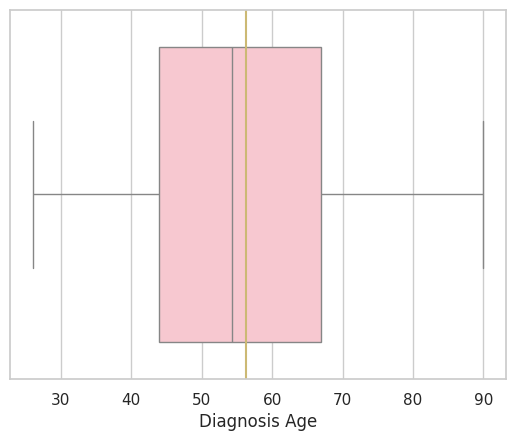

In [246]:
ax=sns.set(style="whitegrid")
sns.boxplot(x=df_mama_age, color= "pink")
plt.axvline(df_mama_age.mean(),c='y')

La gráfica boxplot nos muestra los rangos de los datos en la edad, podemos notar la edad min y máx con casos de cáncer de mama. Se nota de manera gráfica también los percentiles (bordes de la caja) y la media (línea amarilla). No cuenta con muchos valores atípicos.

<Axes: xlabel='Diagnosis Age'>

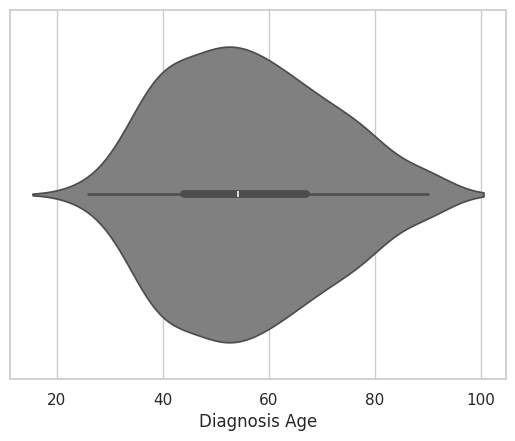

In [247]:
sns.violinplot (x=df_mama_age, color= "grey")

En la gráfica de violin plot podemos observar la media(punto blanco), así como los rangos intercuartilico. Se puede concluir que no se cuenta con una gran variedad de datos atípicos.

In [248]:
#Se imprime rango
print (rango_age_mama)

64.0


In [249]:
#Se segmenta las edades
segmentos = pd.cut(df_mama_age, 32)
df_mama_age.groupby(segmentos).count()

Diagnosis Age
(25.936, 28.0]     2
(28.0, 30.0]       1
(30.0, 32.0]       1
(32.0, 34.0]       4
(34.0, 36.0]       6
(36.0, 38.0]       5
(38.0, 40.0]      13
(40.0, 42.0]       8
(42.0, 44.0]       7
(44.0, 46.0]       5
(46.0, 48.0]      10
(48.0, 50.0]       5
(50.0, 52.0]      16
(52.0, 54.0]       9
(54.0, 56.0]       8
(56.0, 58.0]       1
(58.0, 60.0]      13
(60.0, 62.0]      12
(62.0, 64.0]       3
(64.0, 66.0]       8
(66.0, 68.0]       5
(68.0, 70.0]       7
(70.0, 72.0]       5
(72.0, 74.0]       3
(74.0, 76.0]       4
(76.0, 78.0]       9
(78.0, 80.0]       3
(80.0, 82.0]       4
(82.0, 84.0]       0
(84.0, 86.0]       0
(86.0, 88.0]       0
(88.0, 90.0]       7
Name: Diagnosis Age, dtype: int64

Text(0.5, 1.0, 'Edad de diágnostico en pacientes con cáncer de mama')

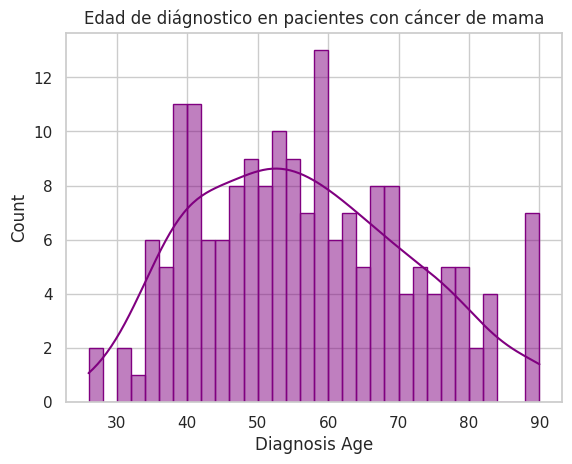

In [250]:
#Histograma
ax=sns.histplot(df_mama_age, bins=32, kde=True, color='purple', edgecolor='purple')
ax.set_title("Edad de diágnostico en pacientes con cáncer de mama")

In [251]:
#Skew de la gráfica
skew(df_mama_age_nans)

0.31307167428028404

In [252]:
#Kurtosis de la gráfica
kurtosis(df_mama_age_nans)

-0.6291407655808059

El histograma representado nos muestra que tiene un comportamiento de distribución "Asimetrica a la derecha", significando que mientras más aumenta la edad, más aumentan los casos de cancer. La simetría esta a 0.31 y la kurtosis es negativa -0.62 presentando menos casos de concentración que nuestra media.

In [253]:
#Conteo de edad de cáncer de mama
df_conteo_mama_age=df_mama_age_nans.value_counts()
df_conteo_mama_age

59.000000    11
52.000000     8
39.000000     7
51.000000     7
54.000000     7
62.000000     6
56.000000     6
69.000000     6
61.000000     6
40.000000     5
77.000000     5
41.000000     5
66.000000     5
47.000000     5
89.000000     4
82.000000     4
78.000000     4
43.000000     4
49.000000     4
48.000000     4
45.000000     3
90.000000     3
67.000000     3
44.000000     3
36.000000     3
38.000000     3
71.000000     3
73.000000     3
34.000000     3
75.000000     3
68.000000     2
64.000000     2
53.000000     2
65.000000     2
26.000000     2
46.000000     2
80.000000     2
58.200000     2
72.000000     2
42.000000     2
37.000000     2
74.583333     1
54.500000     1
79.000000     1
63.000000     1
48.310000     1
41.550000     1
34.060000     1
35.790000     1
50.400000     1
70.000000     1
38.900000     1
47.200000     1
35.000000     1
30.000000     1
33.000000     1
31.000000     1
55.000000     1
57.000000     1
65.833333     1
Name: Diagnosis Age, dtype: int64

In [254]:
# La moda de edad con más cáncer de mama
df_mama_age_nans.mode()

0    59.0
Name: Diagnosis Age, dtype: float64

Pregunta responder:

*  **¿En qué edad se encuentra el mayor porcentaje de casos con cáncer de
mama?**


Después de la limpieza de datos con una población de 298 casos, con ayuda de un histograma y tabla count, podemos observar que la edad donde se observan más casos de cancer de mama es a la edad de 59 años con 11/298 casos positivos.


##**Distribuciones y exploración de variables**

In [255]:
#Dataset: df_mama
#Columna "Ethnicity category"
print(df_mama['Ethnicity Category'])
df_mama_ethnicity = df_mama['Ethnicity Category']

0                            NaN
1                            NaN
2                        Chinese
3                            NaN
4                            NaN
                 ...            
477                          NaN
478    Black or African American
479                        Asian
480                        White
481                        White
Name: Ethnicity Category, Length: 482, dtype: object


In [256]:
#Se cambia el formato a "minusculas" porque se repetian etnia debido al formato de letra
df_mama_ethnicity=df_mama_ethnicity.str.lower()
df_mama_ethnicity


0                            NaN
1                            NaN
2                        chinese
3                            NaN
4                            NaN
                 ...            
477                          NaN
478    black or african american
479                        asian
480                        white
481                        white
Name: Ethnicity Category, Length: 482, dtype: object

In [257]:
#Moda de la étnia con más casos
df_mama_ethnicity.mode()

0    not hispanic or latino
Name: Ethnicity Category, dtype: object

In [258]:
#Se saca el count de la etnia de las pacientes
df_mama_ethnicity.value_counts()

not hispanic or latino                    92
non-spanish; non-hispanic                 77
spanish  nos; hispanic nos, latino nos     6
unknown whether spanish or not             3
hispanic or latino                         3
white                                      2
chinese                                    1
south/central america (except brazil)      1
puerto rican                               1
black or african american                  1
asian                                      1
Name: Ethnicity Category, dtype: int64

In [259]:
#Se unifica la etnia
df_mama_ethnicity.unique()

array([nan, 'chinese', 'non-spanish; non-hispanic',
       'unknown whether spanish or not',
       'spanish  nos; hispanic nos, latino nos',
       'south/central america (except brazil)', 'puerto rican',
       'not hispanic or latino', 'hispanic or latino',
       'black or african american', 'asian', 'white'], dtype=object)

<ipython-input-260-5cd2e3f53943>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=counts.index, y =counts, palette="coolwarm")
<ipython-input-260-5cd2e3f53943>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


Text(0.5, 1.0, 'Mujeres con cáncer de mama')

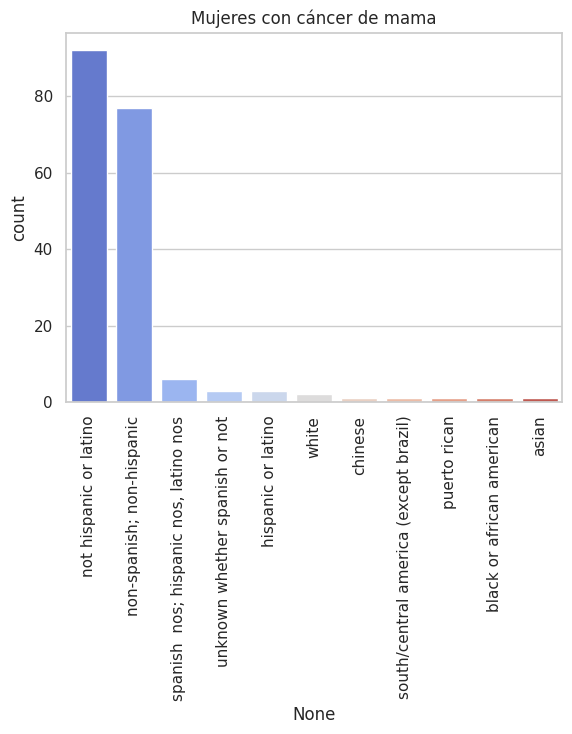

In [260]:
#Gráfica de barras para la etnia
counts=df_mama_ethnicity.value_counts()
ax=sns.barplot(x=counts.index, y =counts, palette="coolwarm")
ax.set(ylabel="count")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title("Mujeres con cáncer de mama")

Pregunta pendiente por responder:

*   **¿Existen patrones geográficos en la prevalencia de cáncer de mama?**

De acuerdo a la gráfica de barras y la tabla count, podemos observar que la etnia de las mujeres donde más casos de cancer de mama es: "not hispanic or latino" presentando 92 casos de cancer.



In [261]:
#Se trabaja con la columna "Tipo de cáncer"
print(df_mama["Cancer Type Detailed"])
df_mama_type=df_mama["Cancer Type Detailed"]

0                                    Breast
1                                    Breast
2      Benign Phyllodes Tumor of the Breast
3             Infiltrating Ductal Carcinoma
4           Ductal Carcinoma In Situ (DCIS)
                       ...                 
477               Invasive Breast Carcinoma
478               Invasive Breast Carcinoma
479               Invasive Breast Carcinoma
480               Invasive Breast Carcinoma
481               Invasive Breast Carcinoma
Name: Cancer Type Detailed, Length: 482, dtype: object


In [262]:
print(df_mama["Overall Survival Status"])
df_mama_survival=df_mama["Overall Survival Status"]

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
477    NaN
478    NaN
479    NaN
480    NaN
481    NaN
Name: Overall Survival Status, Length: 482, dtype: object


In [263]:
#Tablas de contingencia
pd.crosstab((df_mama_survival), (df_mama_type),margins=True, margins_name="Total" )

Cancer Type Detailed,Breast,"Breast Invasive Cancer, NOS",Breast Invasive Carcinoma (NOS),"Breast Invasive Carcinoma, NOS",Breast Invasive Ductal Carcinoma,Breast Invasive Lobular Carcinoma,Breast Invasive Mixed Mucinous Carcinoma,Breast Mixed Ductal and Lobular Carcinoma,Invasive Breast Carcinoma,Metaplastic Breast Cancer,Total
Overall Survival Status,,,,,,,,,,,
0:LIVING,0,2,3,0,140,23,1,14,44,2,229
1:DECEASED,1,0,0,1,70,11,0,3,3,0,89
Total,1,2,3,1,210,34,1,17,47,2,318


Con esta tabla de contigencia podemos observar cada tipo de cancer de mama respecto a su estado del paciente (vivo, muerto).

In [264]:
#Count de tipos de cáncer
df_mama_type.value_counts()

Breast Invasive Ductal Carcinoma             270
Invasive Breast Carcinoma                    109
Breast Invasive Lobular Carcinoma             54
Breast Mixed Ductal and Lobular Carcinoma     23
Breast Invasive Carcinoma, NOS                 7
Breast                                         3
Infiltrating Ductal Carcinoma                  3
Breast Invasive Cancer, NOS                    3
Breast Invasive Carcinoma (NOS)                3
Metaplastic Breast Cancer                      2
Invasive Breast Cancer                         2
Benign Phyllodes Tumor of the Breast           1
Ductal Carcinoma In Situ (DCIS)                1
Breast Invasive Mixed Mucinous Carcinoma       1
Name: Cancer Type Detailed, dtype: int64

<ipython-input-265-89cbdbb7078d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=counts.index, y =counts, palette="magma")
<ipython-input-265-89cbdbb7078d>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


Text(0.5, 1.0, 'Tipos de cáncer de mama')

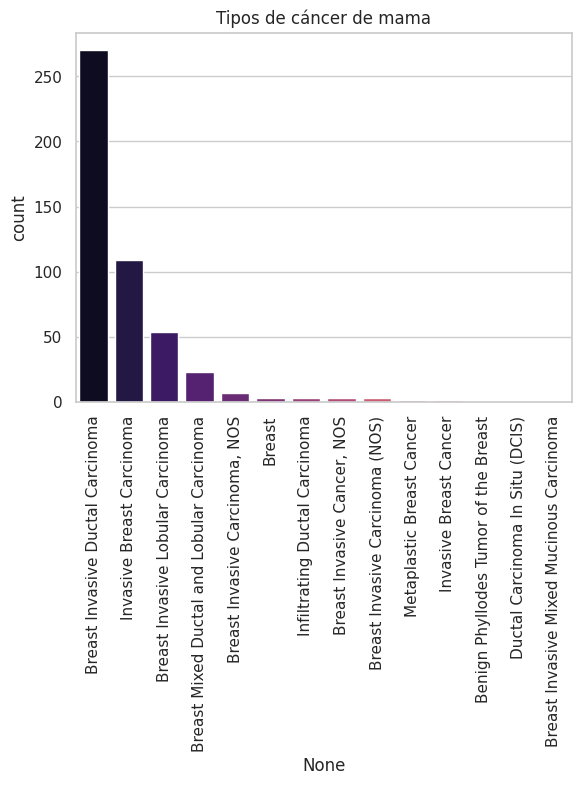

In [265]:
#Gráfica de barras para "tipo de cancer"
counts=df_mama_type.value_counts()
ax=sns.barplot(x=counts.index, y =counts, palette="magma")
ax.set(ylabel="count")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title("Tipos de cáncer de mama")



*  **¿Cuál es el “tipo de cáncer” de mama  con más casos?**

Podemos observar de acuerdo a la función "Count" que el cancér con más casos es el "Breast Invasive Ductal Carcinoma" con 270 casos totales, y gracias a la tabla de contigencia podemos notar que de esos 270 de ese tipo de cáncer solo 140 pacientes siguen con vida.

Pregunta:

* **¿Cuál es la frecuencia de supervivencia entre las pacientes?**

Gracias a la tabla de contigencia podemos observar que el total de datos disponibles con "tipo de cancer" y "superviviencia" es que de las 318 pacientes, 229 siguen vivas y desafortunamente 89 han perdido la vida contra la lucha de esta enfermedad.



In [266]:
#Se manda a llamar df
brca1_mama_mutation.head()

,Sample ID,Cancer Type,Cancer Type Detailed,Protein Change,Annotation OncoKb,CancerHotspot,MutationAssesor Impact,SIFT Impact,sift_score,Polyphen-2 Impact,...,Time To Death (Months),Tumor Sample Histology,Tumor Tissue Origin,T Stage,Archer Panel,Institute Source,Patient Display Name.1,Sample Display Name,Tumor Site,Tumor Size (cm)
Study of Origin,,,,,,,,,,,,,,,,,,,,,
"Metastatic Breast Cancer (INSERM, PLoS Med 2016)",MBC_47,Breast Cancer,Invasive Breast Carcinoma,M1728Kfs*3,Likely Oncogenic,no,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"The Metastatic Breast Cancer Project (Archived, 2020)",MBC-MBCProject_zatdFvhp-Tumor-SM-GQAAR,Breast Cancer,"Breast Invasive Cancer, NOS",X1823_splice,Likely Oncogenic,no,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Breast Invasive Carcinoma (TCGA, Nature 2012)",TCGA-BH-A0WA-01,Breast Cancer,Invasive Breast Carcinoma,X1559_splice,Likely Oncogenic,no,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Breast Invasive Carcinoma (TCGA, Nature 2012)",TCGA-AN-A0XU-01,Breast Cancer,Invasive Breast Carcinoma,G1788V,Likely Oncogenic,no,medium,deleterious,0.0,benign,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Breast Invasive Carcinoma (TCGA, Nature 2012)",TCGA-AR-A0U4-01,Breast Cancer,Invasive Breast Carcinoma,N1121Kfs*12,Likely Oncogenic,no,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##**Correlación**

In [267]:
#Seleccionamos nombre de columnas para el análisis de correlación
columnas_seleccionadas = [
    "sift_score",
    "polyphen_2_score",
    "diagnosis_age",
    "status_pacient"]


In [268]:
#Se crea el datadf_brca1_mama_mutationframe
df_brca1_mama_mutation = brca1_mama_mutation[columnas_seleccionadas]
df_brca1_mama_mutation

,sift_score,polyphen_2_score,diagnosis_age,status_pacient
Study of Origin,,,,
"Metastatic Breast Cancer (INSERM, PLoS Med 2016)",NaN,NaN,NaN,NaN
"The Metastatic Breast Cancer Project (Archived, 2020)",NaN,NaN,NaN,NaN
"Breast Invasive Carcinoma (TCGA, Nature 2012)",NaN,NaN,82.0,0.0
"Breast Invasive Carcinoma (TCGA, Nature 2012)",0.00,0.022,54.0,0.0
"Breast Invasive Carcinoma (TCGA, Nature 2012)",NaN,NaN,54.0,0.0
...,...,...,...,...
"Breast Invasive Carcinoma (TCGA, Firehose Legacy)",NaN,NaN,49.0,0.0
"Breast Invasive Carcinoma (TCGA, Firehose Legacy)",NaN,NaN,51.0,0.0
"Breast Invasive Carcinoma (TCGA, Firehose Legacy)",NaN,NaN,52.0,0.0


In [269]:
#Correlación
df_brca1_mama_mutation.corr()

,sift_score,polyphen_2_score,diagnosis_age,status_pacient
sift_score,1.000000,-0.319986,0.016820,0.194766
polyphen_2_score,-0.319986,1.000000,0.058174,-0.004434
diagnosis_age,0.016820,0.058174,1.000000,0.188905
status_pacient,0.194766,-0.004434,0.188905,1.000000


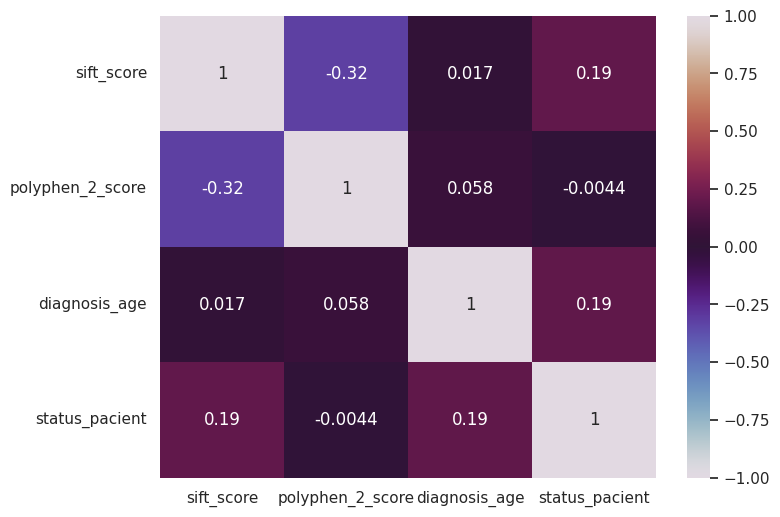

In [270]:
#Heatmap
plt.figure(figsize=(8,6))
ax= sns.heatmap(df_brca1_mama_mutation.corr(),vmin=-1,vmax=1,annot=True, cmap= "twilight")

In [271]:
#Eliminando NA para obtener el scatterplot

columnas_interes = ["sift_score", "polyphen_2_score", "diagnosis_age", "status_pacient"]
brca1_mama_sin_nan = brca1_mama_mutation.dropna(subset=columnas_interes)
print(brca1_mama_sin_nan[columnas_interes])

                                                    sift_score  \
Study of Origin                                                  
Breast Invasive Carcinoma (TCGA, Nature 2012)             0.00   
Breast Invasive Carcinoma (TCGA, Nature 2012)             0.00   
Breast Invasive Carcinoma (TCGA, PanCancer Atlas)         0.00   
Breast Invasive Carcinoma (TCGA, PanCancer Atlas)         0.00   
Breast Invasive Carcinoma (TCGA, Cell 2015)               0.00   
Breast Invasive Carcinoma (TCGA, Cell 2015)               0.00   
Breast Invasive Carcinoma (TCGA, Firehose Legacy)         0.00   
Breast Invasive Carcinoma (TCGA, Nature 2012)             0.00   
Breast Invasive Carcinoma (TCGA, Nature 2012)             0.04   
MAPK on resistance to anti-HER2 therapy for bre...        0.17   
Breast Invasive Carcinoma (TCGA, PanCancer Atlas)         0.05   
Breast Invasive Carcinoma (TCGA, PanCancer Atlas)         0.04   
Breast Invasive Carcinoma (TCGA, PanCancer Atlas)         0.18   
Breast Inv

<Axes: xlabel='sift_score', ylabel='polyphen_2_score'>

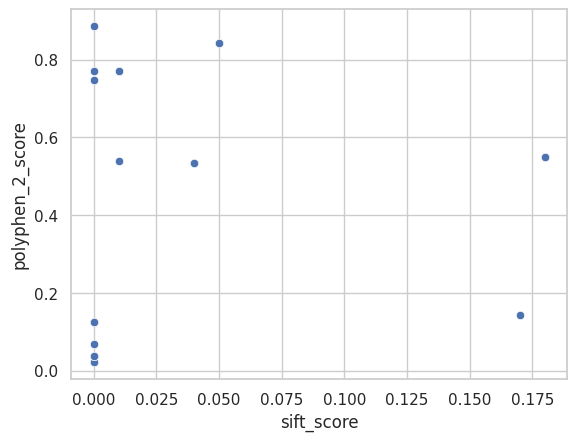

In [272]:
#'sift_score' y 'polyphen_2_score' son las columnas de interés (sin NaN)

sns.scatterplot(x='sift_score', y='polyphen_2_score', data=brca1_mama_sin_nan)


In [273]:
#Correlación entre "Sift_score" y "Polypen_score"
brca1_mama_sin_nan ['sift_score'].corr(brca1_mama_sin_nan['polyphen_2_score'])

0.20067430843229603

La correlación entre estás dos variables es de 0.20

##**Muestreo Aleatorio y Bootstrapping**

In [274]:
#Obtener muestra aleatoria de BRCA1
brca1_sample = brca1_mama_sin_nan.sample(n=15, replace = False)

In [275]:
#La muestra con Bootstrap se realizará con el dato de sift score (este dato nos
#ayuda a medir qué tan dañina es la mutación)

sift_score = brca1_mama_sin_nan['sift_score']
means = []

#Elegimos el valor B para cantidad de muestras
for i in range (200):
  sample = sift_score.sample(n=20,  replace=True)
  #Agregamos la media aritmética
  means.append(sample.mean())

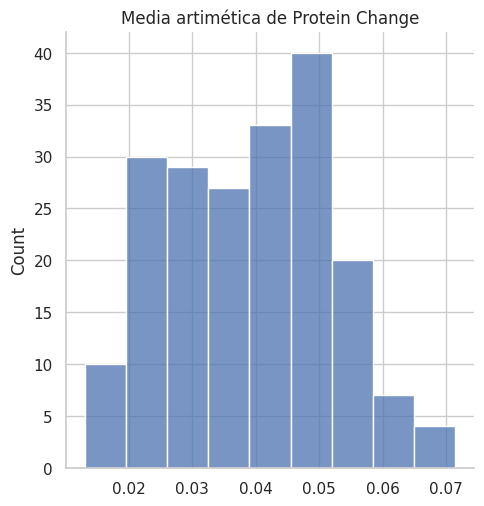

In [276]:
#Creamos una serie con las medias aritméticas y gráficamos
serie_means = pd.Series(means)
sns.displot(data=serie_means, kde=False).set(title="Media artimética de Protein Change")
sns.set_style("ticks")

##**Errores e Intervalos de confianza**

In [277]:
#A partir de lo realizado con bootstrap, obtenemos la variación estandar para visualizar la dispersión de nuestros datos

print(f'Error estandar: {serie_means.std()}')

Error estandar: 0.012537620774029132


In [278]:
#Se genera los cuantiles para nuestros intervalos de confianza

limite_inferior = serie_means.quantile(0.025)

limite_superior = serie_means.quantile(0.975)

media = serie_means.mean()

print(f'Intervalo de 95% de confianza de la media: {limite_inferior} < {media} < {limite_superior}')

Intervalo de 95% de confianza de la media: 0.018487499999999997 < 0.038655 < 0.061012500000000004


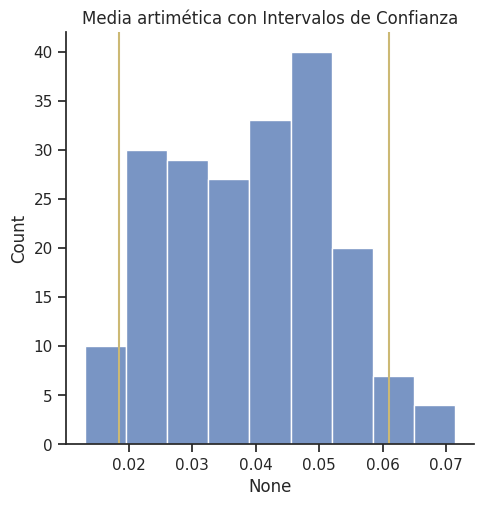

In [279]:
sns.displot(x=serie_means, kde=False).set(title="Media artimética con Intervalos de Confianza")
sns.set_style("ticks")
plt.axvline(limite_inferior,c='y')
plt.axvline(limite_superior,c='y')

Observando esta gráfica podemos definir que al elegir una muestra aleatoria de nuestro conjunto de datos es muy probable que se seleccione un número dentro de los intervalos de confianza.

##**Regresión lineal**

In [280]:
#Modelo
lr= LinearRegression()

In [281]:
x = brca1_mama_sin_nan['sift_score'].to_frame()
y = brca1_mama_sin_nan['polyphen_2_score']
lr.fit(x,y)

LinearRegression()

In [282]:
y_predict = lr.predict(brca1_mama_sin_nan['sift_score'].to_frame())

<Axes: title={'center': 'Scatterplot regresión Lineal'}, xlabel='sift_score', ylabel='polyphen_2_score'>

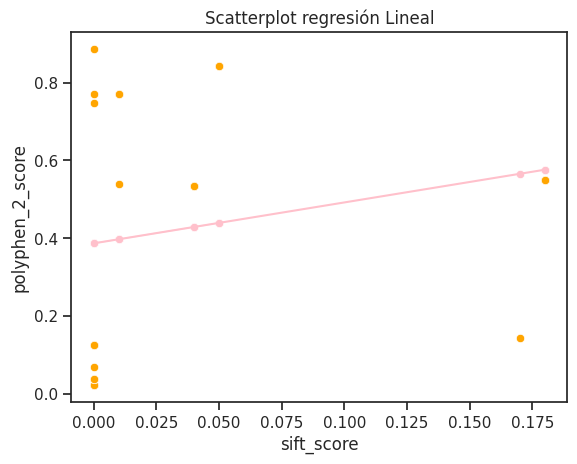

In [283]:
#Scatterplot regresión Lineal

sns.scatterplot(x=brca1_mama_sin_nan['sift_score'], y=y, c='orange').set(title="Scatterplot regresión Lineal")

#Las siguientes dos líneas representan la predicción, una en formato de línea y
#la siguiente marcando los puntos
sns.lineplot(x=brca1_mama_sin_nan['sift_score'], y=y_predict, c='pink')
sns.scatterplot(x=brca1_mama_sin_nan['sift_score'], y=y_predict, c='pink')

In [284]:
#Evaluación de modelo
lr.fit(x, y)
lr.score(x,y)

0.04027017806477995

**Conclusión de regresión lineal**

Debido al score mostrado en la evaluación del modelo *(0.04027017806477995
)*, hemos definido que los datos utilizados para realizar la regresión no son suficientes para poder generar un buen modelo de predicción.

##**Validación cruzada**

In [285]:
#Utilizaremos la información de regresión lineal para hacer la validación cruzada
scores = cross_validate(lr, x, y, scoring='r2')
scores

{'fit_time': array([0.00417352, 0.00137472, 0.00134897, 0.00128341, 0.00124907]),
 'score_time': array([0.00167465, 0.00095606, 0.00090241, 0.00091195, 0.00090289]),
 'test_score': array([-78.50781083,  -0.34676601,  -0.28994309,  -6.71848856,
          0.1173245 ])}

In [286]:
print(f'Score del modelo: {scores["test_score"].mean():.3f} +/- {scores["test_score"].std():.3f}')

Score del modelo: -17.149 +/- 30.784


Contrastando la media del score del modelo contra la std de este, se obtiene la evaluación anterior. En base a esto se determina que es necesario tener un modelo más robusto para mejorar el score de este mismo.

##**Pruebas A/B**

In [287]:
brca1_mama_ab = pd.read_csv('https://raw.githubusercontent.com/PaolaSantiago00/C-ncer-de-mama./main/C-ncer-de-mama-main/BRCA1_mama%20(separado)%20NUEVO%20-%20BRCA1_mama%20(separado)%20NUEVO%20(1).csv')
brca1_mama_ab



,Study of Origin,Sample ID,Cancer Type,Cancer Type Detailed,Protein Change,Annotation OncoKb,CancerHotspot,MutationAssesor Impact,SIFT Impact,sift_score,...,Time To Death (Months),Tumor Sample Histology,Tumor Tissue Origin,T Stage,Archer Panel,Institute Source,Patient Display Name.1,Sample Display Name,Tumor Site,Tumor Size (cm)
0,"Metastatic Breast Cancer (INSERM, PLoS Med 2016)",MBC_47,Breast Cancer,Invasive Breast Carcinoma,M1728Kfs*3,Likely Oncogenic,no,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,The Metastatic Breast Cancer Project (Archived...,MBC-MBCProject_zatdFvhp-Tumor-SM-GQAAR,Breast Cancer,"Breast Invasive Cancer, NOS",X1823_splice,Likely Oncogenic,no,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Breast Invasive Carcinoma (TCGA, Nature 2012)",TCGA-BH-A0WA-01,Breast Cancer,Invasive Breast Carcinoma,X1559_splice,Likely Oncogenic,no,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Breast Invasive Carcinoma (TCGA, Nature 2012)",TCGA-AN-A0XU-01,Breast Cancer,Invasive Breast Carcinoma,G1788V,Likely Oncogenic,no,medium,deleterious,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Breast Invasive Carcinoma (TCGA, Nature 2012)",TCGA-AR-A0U4-01,Breast Cancer,Invasive Breast Carcinoma,N1121Kfs*12,Likely Oncogenic,no,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,"Breast Invasive Carcinoma (TCGA, Firehose Legacy)",TCGA-LL-A5YP-01,Breast Cancer,Breast Invasive Ductal Carcinoma,D96H,Unknown,no,medium,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221,"Breast Invasive Carcinoma (TCGA, Firehose Legacy)",TCGA-AO-A1KR-01,Breast Cancer,Breast Invasive Ductal Carcinoma,C644del,Unknown,no,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222,"Breast Invasive Carcinoma (TCGA, Firehose Legacy)",TCGA-A1-A0SI-01,Breast Cancer,Breast Invasive Ductal Carcinoma,E9Q,Unknown,no,low,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,"Breast Invasive Carcinoma (TCGA, Firehose Legacy)",TCGA-EW-A2FR-01,Breast Cancer,Breast Invasive Ductal Carcinoma,D366N,Unknown,no,medium,tolerated,0.18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [288]:
# Obtener e imprimir el nombre de todas las columnas
print("Nombres de las columnas:")
for nombre_columna in brca1_mama_ab.columns:
    print(nombre_columna)

Nombres de las columnas:
Study of Origin
Sample ID
Cancer Type
Cancer Type Detailed
Protein Change
Annotation OncoKb
CancerHotspot
MutationAssesor Impact
SIFT Impact
sift_score
Polyphen-2 Impact
polyphen_2_score
Mutation Type
Copy #
COSMIC
MS
VS
Center
Chromosome
Start Pos
End Pos
Ref
Var
HGVSg
HGVSc
Allele Freq (T)
Allele Freq (N)
Variant Reads
Ref Reads
Variant Reads (Normal)
Ref Reads (Normal)
# Mut in Sample
Exon
gnomAD
ClinVar
dbSNP
SIGNAL
Adjuvant Chemotherapy
Adjuvant Treatment
diagnosis_age
ER Status By IHC
Followup (years)
Fusion Status
Genomic Alterations
IHC-HER2
Local Regional Recurrence
Metastatic Site
Metastatic tumor indicator
MYB or MYBL1 Fusion
MYB-NFIB Fusion Gene Copy Number Alterations
MYB-NFIB FISH
MYB-NFIB Fusion Gene Non-synonymous Mutations
MYB-NFIB Rearrangement
Neoadjuvant Chemotherapy
Oncotree Code
Overall Patient Histology
Platform
Primary Tumor Site
PR status by ihc
Radiation Therapy
Number of Samples Per Patient
Sample Type
Sex
Somatic Status
Study
Time to

In [289]:
count_ab = brca1_mama_ab.groupby('Annotation OncoKb')[['LIVING', 'DECEASED']].sum()
count_ab

,LIVING,DECEASED
Annotation OncoKb,,
Inconclusive,5.0,1.0
Likely Neutral,2.0,1.0
Likely Oncogenic,52.0,10.0
Oncogenic,5.0,1.0
Unknown,49.0,20.0


In [290]:
count_ab['success rate'] = count_ab['LIVING'] / (count_ab['LIVING'] + count_ab['DECEASED'])
count_ab

,LIVING,DECEASED,success rate
Annotation OncoKb,,,
Inconclusive,5.0,1.0,0.833333
Likely Neutral,2.0,1.0,0.666667
Likely Oncogenic,52.0,10.0,0.838710
Oncogenic,5.0,1.0,0.833333
Unknown,49.0,20.0,0.710145


In [291]:
diferencia_proporcion = 1 - (count_ab.loc['Oncogenic']['success rate']/count_ab.loc['Likely Oncogenic']['success rate'])
diferencia_porcentaje = diferencia_proporcion *100
print (f"El test 'Likely Oncogenic' fue {diferencia_porcentaje:.2f}% más agresivo que 'Oncogenic'")

El test 'Likely Oncogenic' fue 0.64% más agresivo que 'Oncogenic'


In [292]:
all_measurements = brca1_mama_ab[['LIVING', 'DECEASED']]
value_counts = brca1_mama_ab['Annotation OncoKb'].value_counts()

value_counts

Unknown             110
Likely Oncogenic     93
Oncogenic             9
Inconclusive          7
Likely Neutral        6
Name: Annotation OncoKb, dtype: int64

In [293]:
#Aplicación de algoritmo de permutación

conv_a = []
no_conv_a = []
conv_b = []
no_conv_b = []

for i in range(225):
  likely_onc = brca1_mama_ab.sample(value_counts.loc['Likely Oncogenic'], replace = False)
  conv_a.append(likely_onc['LIVING'].sum())
  no_conv_a.append(likely_onc['DECEASED'].sum())
  unknown_onco = brca1_mama_ab.sample(value_counts.loc['Oncogenic'], replace = False)
  conv_b.append(likely_onc['LIVING'].sum())
  no_conv_b.append(likely_onc['DECEASED'].sum())

In [294]:
#Nuevo data frame con permutaciones

perm_result = pd.DataFrame({
    'conv_a':conv_a,
    'no_conv_a':no_conv_a,
    'conv_b':conv_b,
    'no_conv_b':no_conv_b
})

perm_result

,conv_a,no_conv_a,conv_b,no_conv_b
0,42.0,15.0,42.0,15.0
1,51.0,9.0,51.0,9.0
2,47.0,16.0,47.0,16.0
3,47.0,14.0,47.0,14.0
4,49.0,14.0,49.0,14.0
...,...,...,...,...
220,45.0,11.0,45.0,11.0
221,46.0,13.0,46.0,13.0
222,45.0,14.0,45.0,14.0
223,48.0,11.0,48.0,11.0


In [295]:
#Asignación de nuevas columnas

perm_result['a_conv_rate'] = perm_result['conv_a'] / (perm_result['conv_a'] + perm_result['no_conv_a'])

perm_result['b_conv_rate'] = perm_result['conv_b'] / (perm_result['conv_b'] + perm_result['no_conv_b'])

In [296]:
#Obtenemos diferencias de relacion AB permutados
perm_result['diff'] = 1 - (perm_result['b_conv_rate'] / perm_result['a_conv_rate'])

perm_result

,conv_a,no_conv_a,conv_b,no_conv_b,a_conv_rate,b_conv_rate,diff
0,42.0,15.0,42.0,15.0,0.736842,0.736842,0.0
1,51.0,9.0,51.0,9.0,0.850000,0.850000,0.0
2,47.0,16.0,47.0,16.0,0.746032,0.746032,0.0
3,47.0,14.0,47.0,14.0,0.770492,0.770492,0.0
4,49.0,14.0,49.0,14.0,0.777778,0.777778,0.0
...,...,...,...,...,...,...,...
220,45.0,11.0,45.0,11.0,0.803571,0.803571,0.0
221,46.0,13.0,46.0,13.0,0.779661,0.779661,0.0
222,45.0,14.0,45.0,14.0,0.762712,0.762712,0.0
223,48.0,11.0,48.0,11.0,0.813559,0.813559,0.0


In [297]:
perm_result['porcentaje'] = count_ab['LIVING']/ (count_ab['LIVING']+count_ab ['DECEASED'])
perm_result

,conv_a,no_conv_a,conv_b,no_conv_b,a_conv_rate,b_conv_rate,diff,porcentaje
0,42.0,15.0,42.0,15.0,0.736842,0.736842,0.0,NaN
1,51.0,9.0,51.0,9.0,0.850000,0.850000,0.0,NaN
2,47.0,16.0,47.0,16.0,0.746032,0.746032,0.0,NaN
3,47.0,14.0,47.0,14.0,0.770492,0.770492,0.0,NaN
4,49.0,14.0,49.0,14.0,0.777778,0.777778,0.0,NaN
...,...,...,...,...,...,...,...,...
220,45.0,11.0,45.0,11.0,0.803571,0.803571,0.0,NaN
221,46.0,13.0,46.0,13.0,0.779661,0.779661,0.0,NaN
222,45.0,14.0,45.0,14.0,0.762712,0.762712,0.0,NaN
223,48.0,11.0,48.0,11.0,0.813559,0.813559,0.0,NaN


<ipython-input-298-1eb28d80bde3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(perm_result['diff'], kde=False, norm_hist=False)


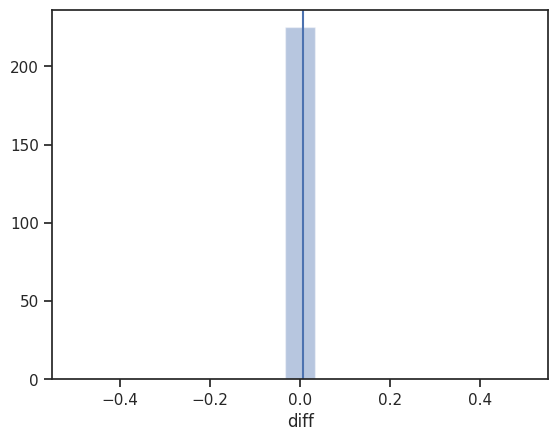

In [298]:
sns.distplot(perm_result['diff'], kde=False, norm_hist=False)
plt.axvline(diferencia_proporcion)

En la gráfica solamente se gráfica una barra sobre el valor de 0, ya que con las pruebas A/B se demustra que no hay una diferencia, debido a que esta es mínima al visualizarse.

In [299]:
valor_alfa=(perm_result['diff'] >= diferencia_proporcion).sum() / perm_result.shape[0]
print(f"El valor alfa resultante es de {valor_alfa}")

El valor alfa resultante es de 0.0


##**Expresiones Regulares y NLTK**

In [300]:
import re
import nltk

In [301]:
#Agrupación de datos
group_by_protein_change = brca1_mama_mutation.groupby('Protein Change')['Annotation OncoKb'].max()

#Limpieza de datos
group_by_protein_change = group_by_protein_change.str.lower()
group_by_protein_change = group_by_protein_change.str.strip()

print(group_by_protein_change)

Protein Change
A1708V                     inconclusive
BRCA1-ERICH5 Fusion    likely oncogenic
BRCA1-NGFR Fusion      likely oncogenic
BRCA1-USP25 Fusion     likely oncogenic
C197Y                           unknown
                             ...       
X198_splice            likely oncogenic
X27_splice             likely oncogenic
Y1127H                          unknown
Y1463*                 likely oncogenic
Y655Vfs*18             likely oncogenic
Name: Annotation OncoKb, Length: 160, dtype: object


In [302]:
#Agrupación por proteínas en Likely Oncogenic
group_by_protein_change[group_by_protein_change.str.contains('Likely Oncogenic',case = False)]

Protein Change
BRCA1-ERICH5 Fusion    likely oncogenic
BRCA1-NGFR Fusion      likely oncogenic
BRCA1-USP25 Fusion     likely oncogenic
C360*                  likely oncogenic
C61G                   likely oncogenic
                             ...       
X1823_splice           likely oncogenic
X198_splice            likely oncogenic
X27_splice             likely oncogenic
Y1463*                 likely oncogenic
Y655Vfs*18             likely oncogenic
Name: Annotation OncoKb, Length: 64, dtype: object

Librería NLTK aplicación

In [303]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [304]:
# Vector de relación de palabras
tokenized = group_by_protein_change.apply(nltk.word_tokenize)

all_words = tokenized.sum()
text = nltk.Text(all_words)
text


<Text: inconclusive likely oncogenic likely oncogenic likely oncogenic unknown...>

In [305]:
text.concordance('oncogenic', lines=20)

Displaying 20 of 71 matches:
inconclusive likely oncogenic likely oncogenic likely oncogenic 
conclusive likely oncogenic likely oncogenic likely oncogenic unknown unknown l
 oncogenic likely oncogenic likely oncogenic unknown unknown likely oncogenic l
y oncogenic unknown unknown likely oncogenic likely oncogenic unknown likely on
wn unknown likely oncogenic likely oncogenic unknown likely oncogenic unknown u
ic likely oncogenic unknown likely oncogenic unknown unknown inconclusive unkno
own unknown unknown unknown likely oncogenic likely neutral likely oncogenic un
ly oncogenic likely neutral likely oncogenic unknown unknown likely oncogenic l
y oncogenic unknown unknown likely oncogenic likely oncogenic unknown likely on
wn unknown likely oncogenic likely oncogenic unknown likely oncogenic likely on
ic likely oncogenic unknown likely oncogenic likely oncogenic unknown likely ne
ic unknown likely oncogenic likely oncogenic unknown likely neutral unknown lik
nown likely neutral unknow

In [306]:
text.concordance('unknown', lines=20)

Displaying 20 of 80 matches:
c likely oncogenic likely oncogenic unknown unknown likely oncogenic likely onc
 oncogenic likely oncogenic unknown unknown likely oncogenic likely oncogenic u
n likely oncogenic likely oncogenic unknown likely oncogenic unknown unknown in
 oncogenic unknown likely oncogenic unknown unknown inconclusive unknown inconc
ic unknown likely oncogenic unknown unknown inconclusive unknown inconclusive u
ogenic unknown unknown inconclusive unknown inconclusive unknown unknown unknow
n inconclusive unknown inconclusive unknown unknown unknown unknown likely onco
lusive unknown inconclusive unknown unknown unknown unknown likely oncogenic li
nknown inconclusive unknown unknown unknown unknown likely oncogenic likely neu
nconclusive unknown unknown unknown unknown likely oncogenic likely neutral lik
nic likely neutral likely oncogenic unknown unknown likely oncogenic likely onc
ly neutral likely oncogenic unknown unknown likely oncogenic likely oncogenic u
n likely on

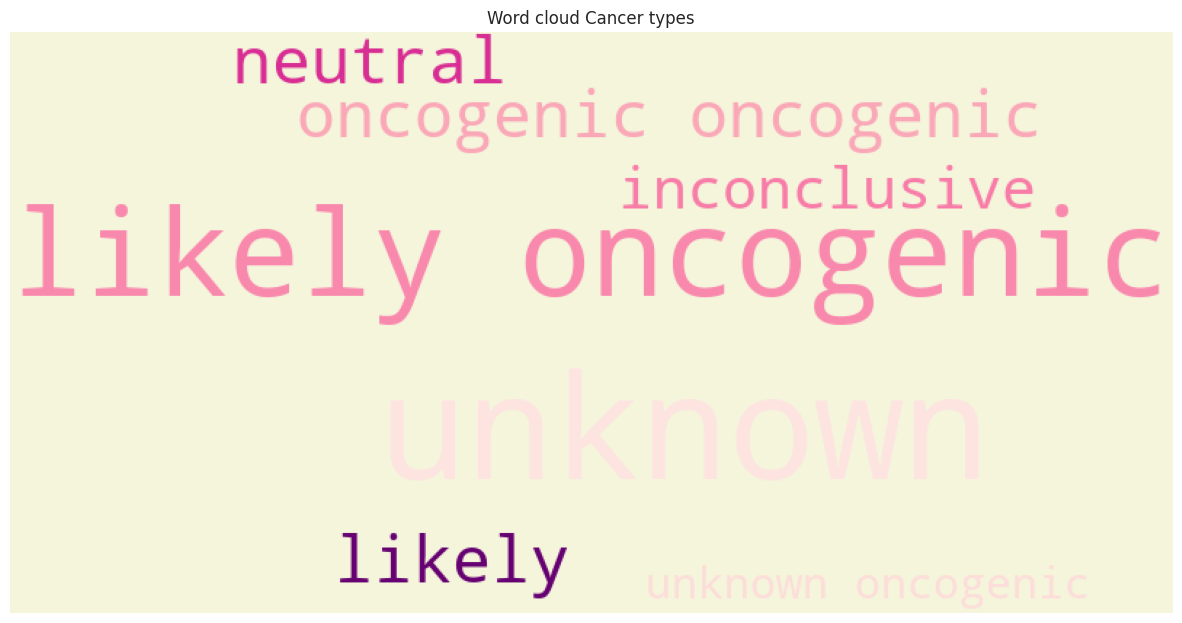

In [307]:
from wordcloud import WordCloud

wordcloud=WordCloud(max_font_size=100,width=800, height=400, background_color='beige', colormap='RdPu').generate(
    ' '.join(group_by_protein_change))

plt.figure(figsize=(15,15))
plt.title('Word cloud Cancer types')
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

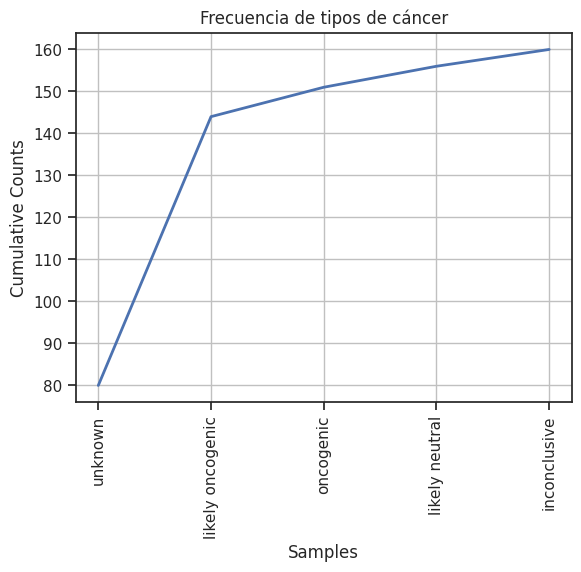

<Axes: title={'center': 'Frecuencia de tipos de cáncer'}, xlabel='Samples', ylabel='Cumulative Counts'>

In [308]:
freq_dist_onco= nltk.FreqDist(group_by_protein_change)
plt.title("Frecuencia de tipos de cáncer")
freq_dist_onco.plot(50, cumulative=True)

En las gráficas anteriores se han graficado las frequencias de tipos de cáncer en las muestras tomadas del DF.

##**Machine Learning**

In [309]:
protein_change = pd.read_csv('https://raw.githubusercontent.com/PaolaSantiago00/C-ncer-de-mama./main/C-ncer-de-mama-main/aminoacidos.csv')

# Crear una nueva columna sin letras para protein change
protein_change['protein_change_numbers_only'] = protein_change['aminoacid'].str.replace(r'\D', '', regex=True)

# Mostrar el DataFrame resultante
print(protein_change)

                                       Study of Origin  \
0     Metastatic Breast Cancer (INSERM, PLoS Med 2016)   
1    The Metastatic Breast Cancer Project (Archived...   
2        Breast Invasive Carcinoma (TCGA, Nature 2012)   
3        Breast Invasive Carcinoma (TCGA, Nature 2012)   
4        Breast Invasive Carcinoma (TCGA, Nature 2012)   
..                                                 ...   
220  Breast Invasive Carcinoma (TCGA, Firehose Legacy)   
221  Breast Invasive Carcinoma (TCGA, Firehose Legacy)   
222  Breast Invasive Carcinoma (TCGA, Firehose Legacy)   
223  Breast Invasive Carcinoma (TCGA, Firehose Legacy)   
224  Breast Invasive Carcinoma (TCGA, Firehose Legacy)   

                                  Sample ID    Cancer Type  \
0                                    MBC_47  Breast Cancer   
1    MBC-MBCProject_zatdFvhp-Tumor-SM-GQAAR  Breast Cancer   
2                           TCGA-BH-A0WA-01  Breast Cancer   
3                           TCGA-AN-A0XU-01  Breast Can

In [310]:
protein_change['protein_change_numbers_only'].unique()

array(['1728', '1823', '1559', '1788', '1121', '23', '1811', '911',
       '1495', '101', '1371', '358', '1219', '729', '648', '71', '1835',
       '111', '1508', '720', '934', '27', '688', '272', '1408', '1329',
       '903', '1463', '1654', '1667', '202', '709', '1731', '1760', '150',
       '1494', '1453', '880', '560', '282', '1663', '502', '655', '686',
       '1253', '1356', '1212', '1849', '1614', '1802', '340', '1759',
       '936', '139', '1699', '1756', '1346', '61', '1713', '1323', '198',
       '250', '845', '411', '1154', '667', '360', '1581', '1085', '1344',
       '951', '1708', '456', '1512', '866', '871', '1590', '197', '1220',
       '14', '1240', '373', '608', '1395', '1825', '561', '1569', '1066',
       '496', '364', '81', '864', '1525', '868', '1564', '1027', '96',
       '644', '9', '366', '1419', '1098', '83', '2', '915', '1578',
       '1589', '1737', '1692', '1813', '1439', '1836', '1551', '914',
       '420', '1127', '1074', '372', '216', '495', '153', '1087'

In [311]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [312]:
protein_change.drop(columns= ['Study of Origin'])

,Sample ID,Cancer Type,Cancer Type Detailed,protein_change,aminoacid,Annotation OncoKb,CancerHotspot,MutationAssesor Impact,SIFT Impact,SIFT Score,...,Tumor Sample Histology,Tumor Tissue Origin,T Stage,Archer Panel,Institute Source,Patient Display Name.1,Sample Display Name,Tumor Site,Tumor Size (cm),protein_change_numbers_only
0,MBC_47,Breast Cancer,Invasive Breast Carcinoma,M1728Kfs*3,M1728Kfs,Likely Oncogenic,no,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1728
1,MBC-MBCProject_zatdFvhp-Tumor-SM-GQAAR,Breast Cancer,"Breast Invasive Cancer, NOS",X1823_splice,X1823_splice,Likely Oncogenic,no,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1823
2,TCGA-BH-A0WA-01,Breast Cancer,Invasive Breast Carcinoma,X1559_splice,X1559_splice,Likely Oncogenic,no,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1559
3,TCGA-AN-A0XU-01,Breast Cancer,Invasive Breast Carcinoma,G1788V,G1788V,Likely Oncogenic,no,medium,deleterious,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1788
4,TCGA-AR-A0U4-01,Breast Cancer,Invasive Breast Carcinoma,N1121Kfs*12,N1121Kfs,Likely Oncogenic,no,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,TCGA-LL-A5YP-01,Breast Cancer,Breast Invasive Ductal Carcinoma,D96H,D96H,Unknown,no,medium,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96
221,TCGA-AO-A1KR-01,Breast Cancer,Breast Invasive Ductal Carcinoma,C644del,C644del,Unknown,no,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,644
222,TCGA-A1-A0SI-01,Breast Cancer,Breast Invasive Ductal Carcinoma,E9Q,E9Q,Unknown,no,low,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
223,TCGA-EW-A2FR-01,Breast Cancer,Breast Invasive Ductal Carcinoma,D366N,D366N,Unknown,no,medium,tolerated,0.18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,366


In [313]:
#Selección de columnas
columnas_seleccionadas = [
    "SIFT Score",
    'Polyphen-2 Score']
protein_change_nan = protein_change.dropna(subset=columnas_seleccionadas)

In [314]:
#Definición de variables
X = protein_change_nan['SIFT Score'].to_frame()
y = protein_change_nan['protein_change_numbers_only']

In [315]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [316]:
logreg = LogisticRegression(max_iter=10_000)

In [317]:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [318]:
y_pred = logreg.predict(X_test)
y_pred

array(['1344', '1344', '1344', '1344', '1344', '1344', '1344', '1344',
       '1344', '1344', '1344', '1344', '1344', '1344', '1344', '1344',
       '1344', '1344', '1344', '1344', '1344', '1344', '1344', '1344',
       '1344', '1344', '1344', '1344', '1344', '1344', '1344', '1344'],
      dtype=object)

In [319]:
logreg.score(X_test, y_test)

0.0

K-Means (Algoritmo no supervisado)

<ipython-input-320-0af8a6a3616c>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')  # Ajustar el ángulo de rotación


<Axes: title={'center': 'Grado de Afectación celular'}, xlabel='Sift Score', ylabel='Polyphen-2 Score'>

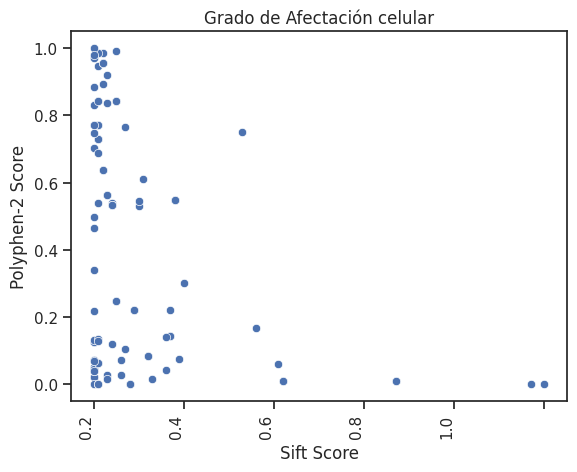

In [320]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Grado de Afectación celular')
ax.set_xlabel('Sift Score')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')  # Ajustar el ángulo de rotación

sns.scatterplot(x=protein_change_nan['SIFT Score'], y=protein_change_nan['Polyphen-2 Score'], ax=ax)

In [321]:
from sklearn.cluster import KMeans

In [322]:
k_means = KMeans(n_clusters=6, max_iter=10_000)

In [323]:
k_means.fit(protein_change_nan[['SIFT Score', 'Polyphen-2 Score']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=10000, n_clusters=6)

In [324]:
k_means.cluster_centers_

array([[0.03135135, 0.08102703],
       [0.01384615, 0.95692308],
       [0.8275    , 0.005     ],
       [0.06105263, 0.53942105],
       [0.25727273, 0.11927273],
       [0.0335    , 0.777     ]])

<Axes: title={'center': 'Grado de Afectación celular'}, xlabel='Sift Score', ylabel='Polyphen-2 Score'>

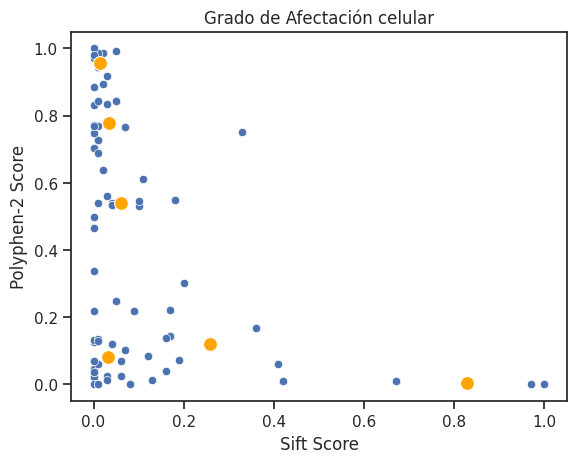

In [325]:
centers = k_means.cluster_centers_
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Grado de Afectación celular')
ax.set_xlabel('Sift Score')
ax.set_ylabel('Polyphen-2 Score')

sns.scatterplot(x=protein_change_nan['SIFT Score'], y=protein_change_nan['Polyphen-2 Score'], ax=ax)
sns.scatterplot(x=centers[:,0], y=centers[:,1], ax=ax, s=100, c='orange')

In [326]:
clasificaciones = k_means.predict(protein_change_nan[['SIFT Score', 'Polyphen-2 Score']])

<Axes: title={'center': 'Grado de Afectación celular'}, xlabel='Sift Score', ylabel='Polyphen-2 Score'>

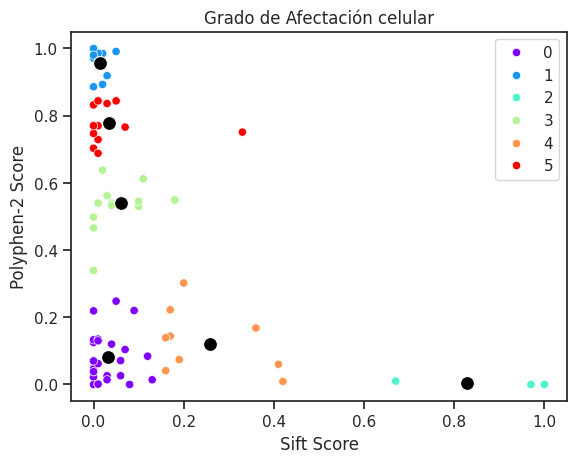

In [327]:
centers = k_means.cluster_centers_
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Grado de Afectación celular')
ax.set_xlabel('Sift Score')
ax.set_ylabel('Polyphen-2 Score')

sns.scatterplot(x=protein_change_nan['SIFT Score'], y=protein_change_nan['Polyphen-2 Score'], hue=clasificaciones, ax=ax, palette='rainbow')
sns.scatterplot(x=centers[:,0], y=centers[:,1], ax=ax, s=100, c='black')